#### 1) No exemplo em sala de aula da regressão não-linear, implemente a normalização dos dados (x_new = (x_old – media)/desvio_padrao)  e compare a convergência, exibindo a comparação dos dois gráficos da função custo: normalizado e não-normalizado. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

##### Funções para regressão não-linear

In [6]:
def pontos2d(w, P):
    np.random.seed(31)
    X = 5*np.random.random_sample(P)
    X = np.array(X)
    Y = np.sin(X[:])+0.2*np.random.random_sample(P)
    return X,Y

def f(v, x):
    return np.sin(v[0] + v[1]*x)

def model(w, v, x_p):
    a = w[0] + f(v,x_p)*w[1]
    return a

def NL_regression(w,v,x,y):
    P = len(x)
    cost = 0
    for p in range (P):
        cost = cost + (model(w,v,x[p]) - y[p])**2
    return cost/P

def NL_grad(w,v,x,y):
    P = len(x)
    grad = np.zeros(4)
    for p in range(P):
        k = 2 * (model(w,v,x[p]) - y[p])
        grad[0] += k
        grad[1] += k * f(v,x[p])
        grad[2] += k * np.cos(v[0]+x[p]*v[1]) * w[1]
        grad[3] += k * np.cos(v[0]+x[p]*v[1]) * w[1] * x[p]
        grad = grad / P
    return grad

def grad_desc(w,v,x,y,alpha,max_its):
    w_THETA = [w[0],w[1],v[0],v[1]]
    w_THETA = np.array(w_THETA)
    w_h = [w_THETA]
    cost1 = NL_regression(w,v,x,y)
    cost_h = [cost1]
    for k in range(max_its):
        w_THETA = w_THETA - alpha * NL_grad(w,v,x,y)
        w_h.append(w_THETA)
        w[0] = w_THETA[0]
        w[1] = w_THETA[1]
        v[0] = w_THETA[2]
        v[1] = w_THETA[3]
        cost2 = NL_regression(w,v,x,y)
        cost_h.append(cost2)
        if cost2 > cost1:
            alpha = alpha / 10
            print('alpha=',alpha)
            cost1 = cost2
    return w_h,cost_h



##### Versão não normalizada

Resultado Custo:0.5472


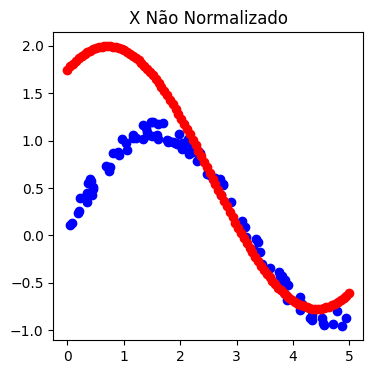

In [18]:
P = 100
w = np.array([1.,1.])
v = np.array([1.,1.])
[X,Y] = pontos2d(w,P)
max_its = 2000
alpha = 1
[w_h,cost_h] = grad_desc(w,v,X,Y,alpha,max_its)
last_w = w_h[-1]
last_cost = cost_h[-1]

plt.figure(figsize = (4,4))
plt.scatter(X,Y,c='b')
x = np.linspace(0,5,100)
w[0] = last_w[0]
w[1] = last_w[1]
v[0] = last_w[2]
v[1] = last_w[3]
y = model(w,v,x)

print("Resultado Custo: {:.4f}".format(last_cost))

plt.title("X Não Normalizado")
plt.scatter(x,y,c='r')
plt.show()

##### Versão normalizada

In [19]:
def normalize(X) -> np.ndarray:
    return (X - np.mean(X)) / np.std(X)
     

Resultado Custo:0.3403


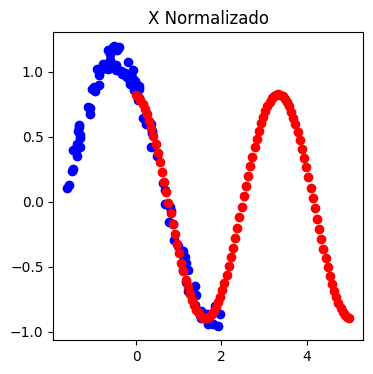

In [20]:
P = 100
w = np.array([1.,1.])
v = np.array([1.,1.])
[X,Y] = pontos2d(w,P)
max_its = 2000
alpha = 1
X_normalized = normalize(X)
[w_h, cost_h] = grad_desc(w,v,X_normalized,Y,alpha,max_its)
last_w = w_h[-1]
last_cost = cost_h[-1]

plt.figure(figsize = (4,4))
plt.scatter(X_normalized,Y,c='b')

w[0] = last_w[0]
w[1] = last_w[1]
v[0] = last_w[2]
v[1] = last_w[3]

x = np.linspace(0,5,100)
y = model(w,v,x)

print("Resultado Custo: {:.4f}".format(last_cost))

plt.title("X Normalizado")
plt.scatter(x,y,c='r')
plt.show()